<h1 align="center">Capstone Project : Mental Health Analysis</h1>


<div align="center">
<img src="https://i.imgur.com/q261Mo0.jpeg" style="width:70%"></img>
</div>
<div align="center">Image generated by Gemini
   

# 1. Introduction
**What is Mental Health?**

Mental health encompasses our emotional, psychological, and social well-being. It affects how we think, feel, and act. It also helps determine how we handle stress, relate to others, and make choices. Mental health is important at every stage of life, from childhood and adolescence through adulthood.   

**The Importance of Addressing Mental Health**

Mental health is a critical component of overall health and well-being. It impacts our ability to function effectively in our daily lives, build and maintain relationships, and contribute to our communities. Unfortunately, mental health challenges are widespread and often carry a significant burden. The World Health Organization estimates that nearly one billion people worldwide live with a mental disorder.

**The Need for Analysis**

This analysis aims to shed light on the growing stress phenomenon by examining its prevalence and potential contributing factors. By understanding the complex interplay of individual, social, and environmental factors, we can develop targeted interventions and support systems to promote mental well-being and resilience.

# 2. Objectives

**A. Find the country with the biggest increase in stress (Relative change, Absolute change and Prevalence)**

Relative change: Captures the percentage increase in stress, providing insights into the rate of change.

Absolute change: Indicates the actual numerical increase in stress levels, offering a concrete measure of the change.

Prevalence: Highlights the current proportion of the population experiencing stress, providing context for the increase.

**B. Understand the stress trends in these countries.**

**C. Figure out why stress is rising in Singapore and suggest solutions.**

**D. Identify countries with lower stress that might be better places to live.**

**E. Suggestions on how to handle and reduce stress.**


# 3. Data Acquisition and Exploration
Dataset Selection, Data Cleaning and exploration.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-dataset/Mental Health Dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import plotly.express as px
import plotly.io as pio
import altair as alt
import statsmodels.api as sm

from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/mental-health-dataset/Mental Health Dataset.csv')  # Adjust file path if needed

# Print the column names and their data types
print(df.shape)
print(df.info())

# Display the first 5 rows
df.head()

(292364, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [4]:
# Check the unique values 
print("Unique values\n")
print(df.nunique())


Unique values

Timestamp                  734
Gender                       2
Country                     35
Occupation                   5
self_employed                2
family_history               2
treatment                    2
Days_Indoors                 5
Growing_Stress               3
Changes_Habits               3
Mental_Health_History        3
Mood_Swings                  3
Coping_Struggles             2
Work_Interest                3
Social_Weakness              3
mental_health_interview      3
care_options                 3
dtype: int64


In [5]:
# Fill missing values in `self_employed` with 'Unknown'
df['self_employed'].fillna('Unknown', inplace=True)

In [6]:
df.describe().T

,count,unique,top,freq
Timestamp,292364,734,2014-08-27 12:31:41,780
Gender,292364,2,Male,239850
Country,292364,35,United States,171308
Occupation,292364,5,Housewife,66351
self_employed,292364,3,No,257994
family_history,292364,2,No,176832
treatment,292364,2,Yes,147606
Days_Indoors,292364,5,1-14 days,63548
Growing_Stress,292364,3,Maybe,99985
Changes_Habits,292364,3,Yes,109523


In [7]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,Unknown,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,Unknown,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,Unknown,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


# 4. Exploratory Data Analysis (EDA)
Visualization: Use visualizations like bar charts and pie charts to illustrate relationships and trends.

In [8]:
# List of columns to visualize
columns_to_visualize = ['Gender','self_employed','family_history', 'treatment', 'Days_Indoors','Growing_Stress','Changes_Habits', 'Mental_Health_History', 'Mood_Swings','Coping_Struggles', 'Work_Interest', 'Social_Weakness']

# Create a list to store the charts
charts = []

# Create and store bar charts for each column
for col in columns_to_visualize:
    # Count the occurrences of each unique value in the column
    value_counts = df[col].value_counts().reset_index()
    value_counts.columns = [col, 'count']

    # Create the bar chart
    chart = alt.Chart(value_counts).mark_bar().encode(
        x=alt.X(col, axis=alt.Axis(labelAngle=-45)),  # Rotate x-axis labels for better readability
        y='count',
        tooltip=[col, 'count']
    ).properties(
        title=f'Distribution of {col}'
    ).interactive()

    # Append the chart to the list
    charts.append(chart)

# Arrange the charts in a 3x4 grid
row1 = alt.hconcat(charts[0], charts[1], charts[2], charts[3])
row2 = alt.hconcat(charts[4], charts[5], charts[6], charts[7])
row3 = alt.hconcat(charts[8], charts[9], charts[10], charts[11])

fig = alt.vconcat(row1, row2, row3)

# Display the final combined chart

fig.display()

alt.VConcatChart(...)

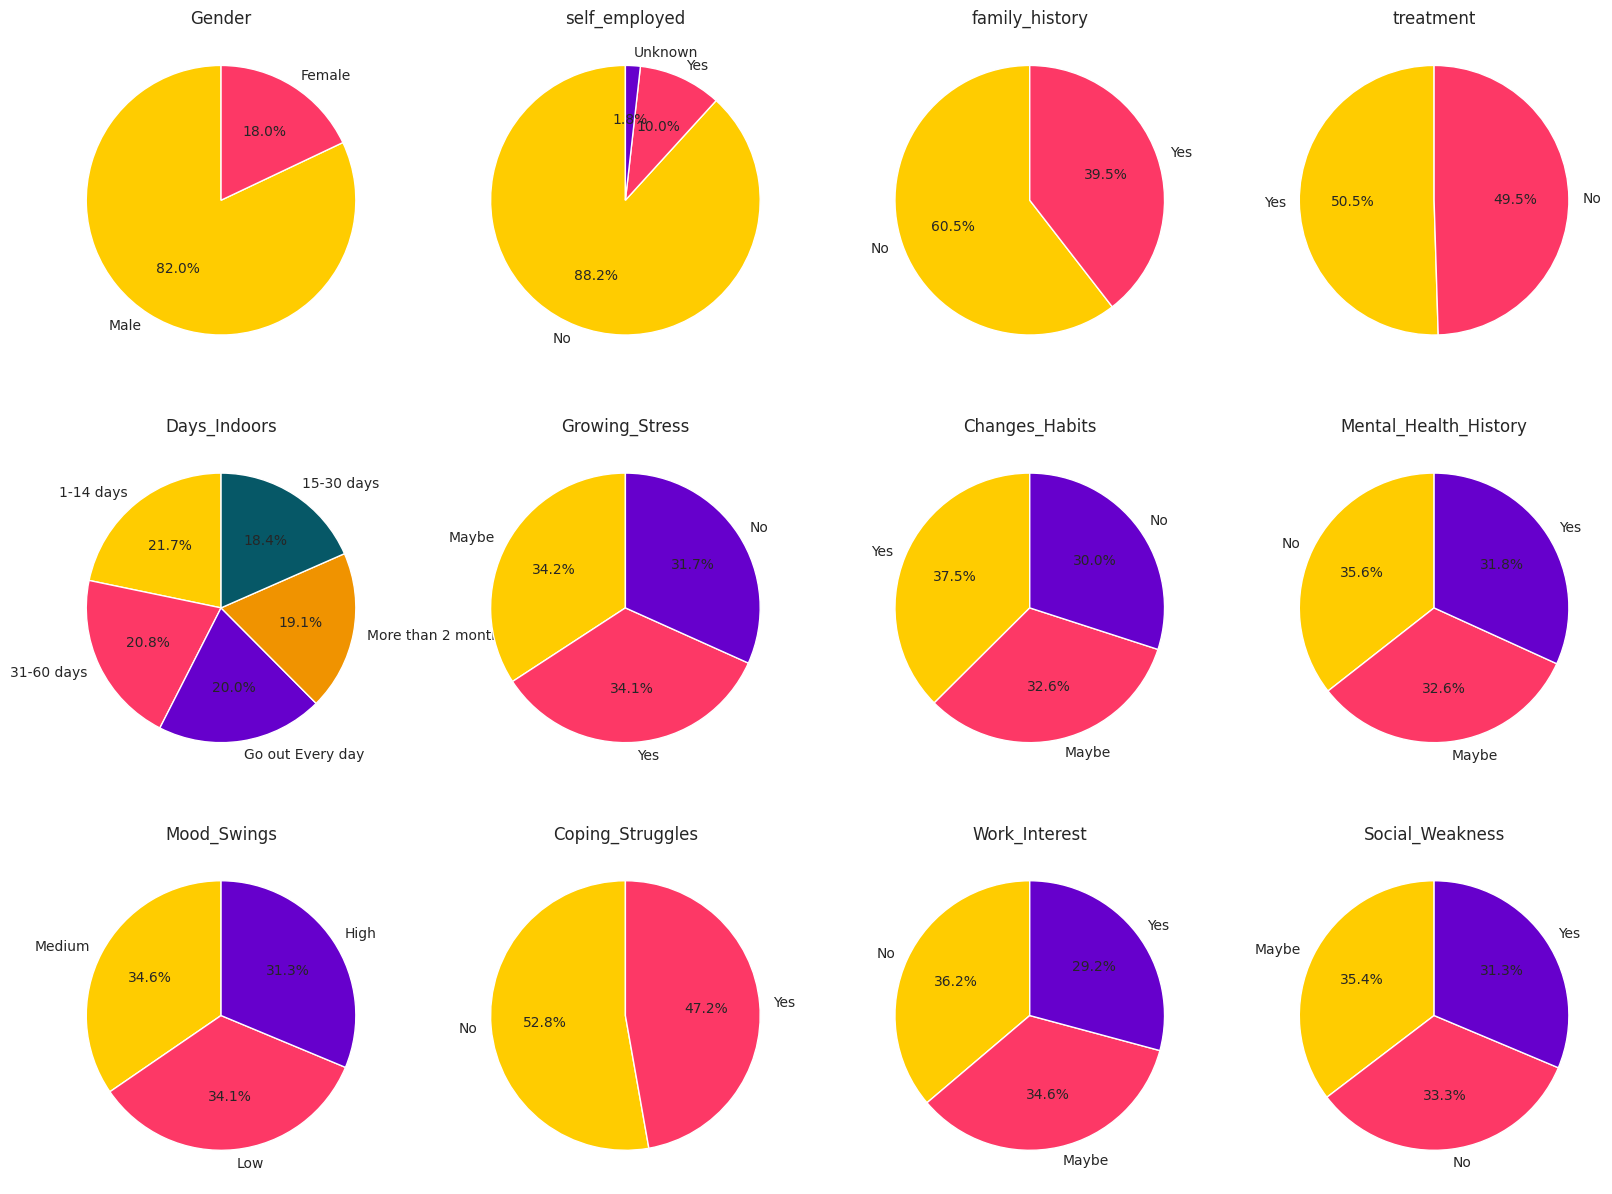

In [9]:
sns.set_style("whitegrid")

cols_to_visualize = ['Gender','self_employed','family_history', 'treatment', 'Days_Indoors',
                     'Growing_Stress','Changes_Habits', 'Mental_Health_History', 'Mood_Swings','Coping_Struggles', 'Work_Interest', 'Social_Weakness']
counts = []

for col in cols_to_visualize:# for i in day_in.containers:
#     day_in.bar_label(i)
    counts.append(df[col].value_counts())
    
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
axs = axs.flatten()

for i, (col, count) in enumerate(zip(cols_to_visualize, counts)):
    axs[i].pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, colors = ['#ffcc00','#fd3866','#6600cc','#f09300','#065867'])
    axs[i].set_title(col)
    axs[i].grid(False)
    

plt.show()

**Population who took the survey indicated "yes", "no" or "maybe" for Growing Stress.**

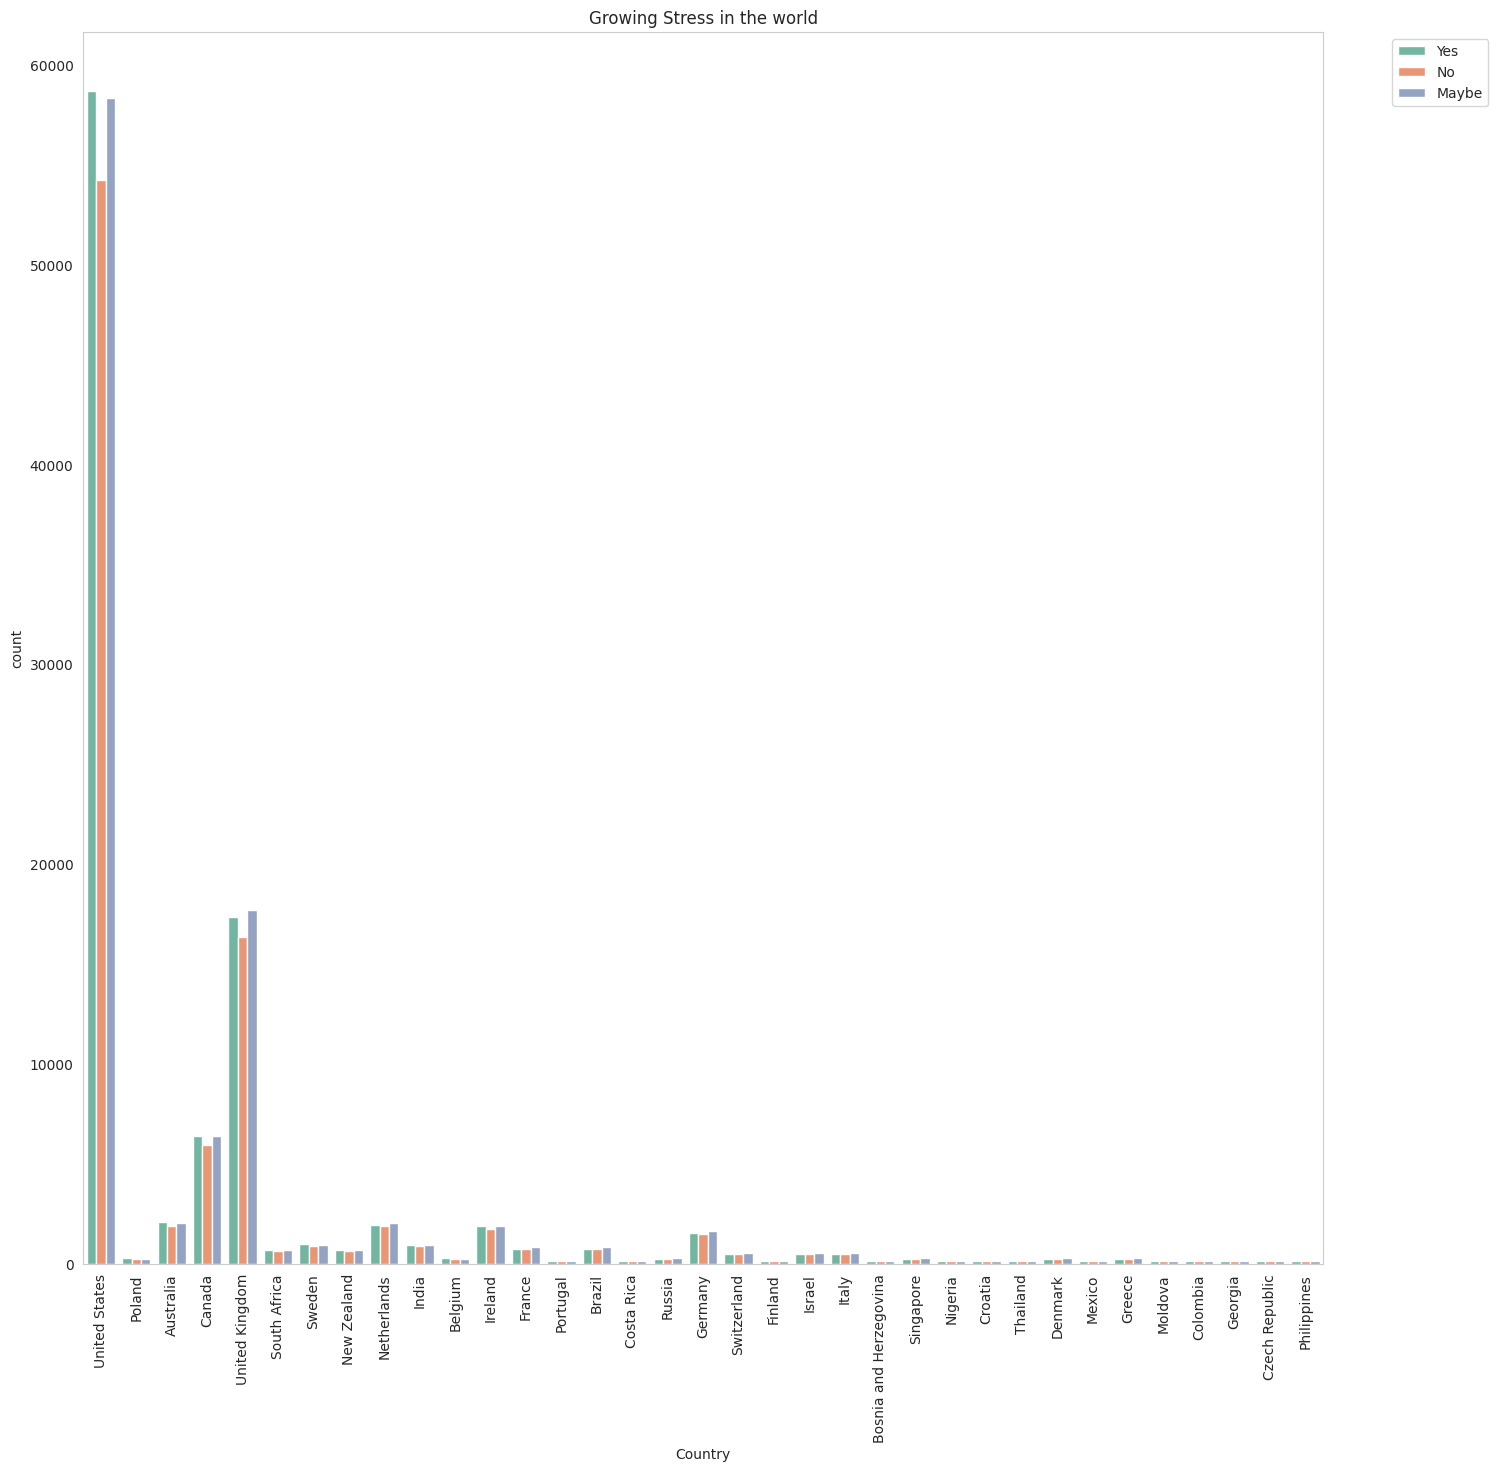

In [10]:
plt.figure(figsize=(16, 16))
ax1 = sns.countplot(x='Country', hue='Growing_Stress', data=df,palette="Set2")
plt.title('Growing Stress in the world')
plt.xticks(rotation = 90)
plt.grid(False)
# for container in ax1.containers:
#     ax1.bar_label(container, label_type='edge')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**A. Find the country with the biggest increase in stress (Relative change, Absolute change and Prevalence)**

We chose those specific columns **('Growing_Stress', 'Changes_Habits', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness')** as stress-related variables for the analysis primarily because they directly reflect the presence or absence of stress-related symptoms or behaviors. 

Let's break down why each one is relevant:

**Growing_Stress:** This is the target variable we're trying to predict and understand. It directly indicates whether the respondent feels their stress is increasing.

**Changes_Habits:** Changes in habits, such as sleep patterns, eating habits, or substance use, can be a common response to stress.

**Coping_Struggles:** Difficulty coping with daily challenges or responsibilities is a clear sign of stress impacting an individual's well-being.

**Work_Interest:** A decline in interest or motivation towards work can be a consequence of stress and burnout.

**Social_Weakness:**  Feeling socially withdrawn or isolated is often linked to stress and mental health challenges.

These variables, when combined into a Stress_Score, provide a multi-faceted view of an individual's stress level based on self-reported experiences and behaviors.

Why other columns were excluded:

-Timestamp: While useful for analyzing temporal trends, it's not a direct indicator of stress itself.

-Gender, Country, self_employed, family_history, treatment, Mental_Health_History, Mood_Swings, mental_health_interview: These are potential predictors or factors that might influence stress levels, but they don't directly represent the presence or experience of stress.

-Occupation, care_options: These have high cardinality (many unique categories) which can make modeling challenging and potentially less interpretable.

-Days_Indoors: While potentially related to stress, it might also be influenced by other factors (e.g., weather, lifestyle choices) and its relationship with stress might not be straightforward.

In summary:

The chosen stress-related columns offer a direct and relatively objective assessment of stress based on self-reported behaviors and experiences. While other variables might also be indirectly linked to stress, these five were selected for their strong conceptual connection to the concept of growing stress.

It's important to acknowledge that this is just one possible approach to defining and measuring stress within this dataset. Depending on the specific research questions and focus of your analysis, you could consider including or excluding other variables based on their relevance and potential impact on stress levels.



In [11]:
#Read the CSV file into a DataFrame
df = pd.read_csv('/kaggle/input/mental-health-dataset/Mental Health Dataset.csv')

# 1. Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 2. List of stress-related columns
stress_cols = ['Growing_Stress', 'Changes_Habits', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']

# 3. Replace 'Yes' with 1 and 'No' with 0 in the specified columns
for col in stress_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# 4. Calculate the 'Stress_Score'
df['Stress_Score'] = df[stress_cols].sum(axis=1)

# 5. Group by 'Country' and 'Timestamp', calculate the mean 'Stress_Score', and reset the index
df_grouped = df.groupby(['Country', 'Timestamp'])['Stress_Score'].mean().reset_index()

# 6. Sort by 'Country' and 'Timestamp'
df_grouped = df_grouped.sort_values(['Country', 'Timestamp'])

# 7. Calculate the relative change in 'Stress_Score' for each country, and sort by 'Stress_Score'
stress_growth_relative = df_grouped.groupby('Country')['Stress_Score'].agg(
    lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0]
).sort_values(ascending=False)

# 8. Extract the country with the highest stress growth
highest_growth_country_relative = stress_growth_relative.index[0]

# 9. Print the country with the highest *relative* growing stress
print(f"Country with highest relative growing stress: {highest_growth_country_relative}")
print(stress_growth_relative)
# 10. Calculate the absolute change in 'Stress_Score' for each country
stress_growth_absolute = df_grouped.groupby('Country')['Stress_Score'].agg(
    lambda x: x.iloc[-1] - x.iloc[0]
).sort_values(ascending=False)

# 11. Extract the country with the highest absolute stress growth
highest_growth_country_absolute = stress_growth_absolute.index[0]

# 12. Print the country with the highest *absolute* growing stress
print(f"Country with highest absolute growing stress: {highest_growth_country_absolute}\n")
print(stress_growth_absolute)

Country with highest relative growing stress: New Zealand
Country
New Zealand               0.090619
Belgium                   0.090619
Israel                    0.000000
Ireland                   0.000000
Thailand                  0.000000
Singapore                 0.000000
Russia                    0.000000
Portugal                  0.000000
United Kingdom            0.000000
Philippines               0.000000
Nigeria                   0.000000
Netherlands               0.000000
Moldova                   0.000000
Mexico                    0.000000
Italy                     0.000000
India                     0.000000
Switzerland               0.000000
Greece                    0.000000
Germany                   0.000000
Georgia                   0.000000
France                    0.000000
Finland                   0.000000
Denmark                   0.000000
Czech Republic            0.000000
Croatia                   0.000000
Costa Rica                0.000000
Colombia                

In [12]:
# 13. Get top 3 countries from each analysis
# a. Calculate proportion of 'Growing_Stress' by 'Country'
country_stress_prop = df.groupby('Country')['Growing_Stress'].mean().reset_index(name='StressProportion')
print(country_stress_prop)
# b. Sort and extract top 3 countries based on prevalence
top_3_current = country_stress_prop.nlargest(3, 'StressProportion')['Country']

# c. Extract top 3 countries based on relative stress growth from `stress_growth_relative` series
top_3_relative = stress_growth_relative.nlargest(3).index

# d. Extract top 3 countries based on absolute stress growth from `stress_growth_absolute` series
top_3_absolute = stress_growth_absolute.nlargest(3).index

# 14. Print the top 3 countries in markdown format
print("\nTop 3 Countries by Stress Growth:\n")
print("Current Dataset (Prevalence):")
print(top_3_current.to_markdown(numalign="left", stralign="left"))
print("\nRelative Change:")
print(pd.Series(top_3_relative).to_markdown(numalign="left", stralign="left"))
print("\nAbsolute Change:")
print(pd.Series(top_3_absolute).to_markdown(numalign="left", stralign="left"))

                   Country  StressProportion
0                Australia          0.525131
1                  Belgium          0.540395
2   Bosnia and Herzegovina          0.505929
3                   Brazil          0.505929
4                   Canada          0.519919
5                 Colombia          0.505929
6               Costa Rica          0.505929
7                  Croatia          0.505929
8           Czech Republic          0.505929
9                  Denmark          0.505929
10                 Finland          0.505929
11                  France          0.505929
12                 Georgia          0.505929
13                 Germany          0.505929
14                  Greece          0.505929
15                   India          0.516465
16                 Ireland          0.516465
17                  Israel          0.505929
18                   Italy          0.505929
19                  Mexico          0.505929
20                 Moldova          0.505929
21        

# 5. Statistical Analysis


**B. Understand the stress trends in these countries.**

In [13]:
# 15. Round 'StressProportion' to 3 decimal places
country_stress_prop['StressProportion'] = country_stress_prop['StressProportion'].round(3)

# 16. Sort by 'StressProportion' in descending order
country_stress_prop_sorted = country_stress_prop.sort_values('StressProportion', ascending=False)

# 17. Print the sorted DataFrame
print("\nStress Score for all Countries:\n")
print(country_stress_prop_sorted.to_markdown(index=False, numalign="left", stralign="left"))

# 18. Create the histogram
chart = alt.Chart(country_stress_prop).mark_bar().encode(
    x=alt.X('StressProportion:Q', bin=True, title='Stress Proportion'),
    y=alt.Y('count()', title='Number of Countries'),
    tooltip=[alt.Tooltip('StressProportion:Q', bin=True, title='Stress Proportion'), 'count()']
).properties(
    title='Distribution of Stress Scores Across Countries'
).interactive()

# 19. Display the chart 
chart


Stress Score for all Countries:

| Country                | StressProportion   |
|:-----------------------|:-------------------|
| Belgium                | 0.54               |
| Poland                 | 0.54               |
| Sweden                 | 0.526              |
| Australia              | 0.525              |
| South Africa           | 0.521              |
| New Zealand            | 0.521              |
| United States          | 0.52               |
| Canada                 | 0.52               |
| India                  | 0.516              |
| Ireland                | 0.516              |
| United Kingdom         | 0.515              |
| Netherlands            | 0.511              |
| Colombia               | 0.506              |
| Thailand               | 0.506              |
| Switzerland            | 0.506              |
| Bosnia and Herzegovina | 0.506              |
| Brazil                 | 0.506              |
| Singapore              | 0.506              |
| Russ

alt.Chart(...)

We will filter the df_grouped DataFrame for the three countries: New Zealand, Belgium, and Singapore. Then, we'll pivot the DataFrame to have Timestamp as the index and Country as the columns. Finally, we'll melt the DataFrame for plotting and create a line graph to compare stress trends over time for these three countries.

In [14]:
# 20 . Filter data for the three countries
countries_to_compare = ['New Zealand', 'Belgium', 'Singapore']
filtered_data = df_grouped[df_grouped['Country'].isin(countries_to_compare)]

# 21 . Pivot the DataFrame
pivoted_data = filtered_data.pivot(index='Timestamp', columns='Country', values='Stress_Score').reset_index()

# 22 . Melt the DataFrame for plotting
melted_data = pivoted_data.melt('Timestamp', var_name='Country', value_name='Stress_Score')

# 23. Plot line graph
chart_stress_trends = alt.Chart(melted_data).mark_line(point=True).encode(
    x='Timestamp:T',
    y='Stress_Score:Q',
    color='Country:N',
    tooltip = ['Timestamp', 'Stress_Score', 'Country']
).properties(
    title='Stress Trends Over Time for New Zealand, Belgium, and Singapore'
).interactive()

# 24. Display plot
chart_stress_trends

alt.Chart(...)

**Comparison and Analysis of Stress Trends**

The line graph titled 'Stress Trends Over Time for New Zealand, Belgium, and Singapore' illustrates the stress trends for these three countries.

**Belgium:** While having the highest prevalence of growing stress based on the current dataset, the graph reveals that Belgium's stress levels remained relatively stable over time, with a slight increase towards the end of the observed period. This suggests that although a larger proportion of individuals in Belgium report experiencing growing stress, the overall increase in stress levels might not be as dramatic.

**New Zealand:** Identified as the country with the highest relative and absolute stress growth, the graph demonstrates a clear upward trend in stress scores over time. This indicates a substantial increase in stress levels compared to the initial state, supporting its top ranking in both relative and absolute change metrics.

**Singapore:** The graph shows a relatively flat trend for Singapore, suggesting that stress levels remained fairly constant throughout the observed period. This aligns with its lower ranking in both relative and absolute stress growth metrics.

Key Observations:

-The contrast between Belgium and New Zealand highlights the distinction between prevalence and change in stress levels. 

-While Belgium has a higher proportion of individuals reporting growing stress, New Zealand experienced a more significant increase in stress levels over time.

-Singapore's stable stress trend could be attributed to various factors, such as effective stress management strategies, strong social support systems, or favorable socio-economic conditions. 

Further investigation into these factors could provide valuable insights for other countries.
Overall, this analysis underscores the importance of considering both the prevalence and the change in stress levels when assessing mental health trends. It also emphasizes the need for targeted interventions and support systems tailored to the specific needs and challenges faced by different countries and populations.

<div align="center">
<img src="https://i.imgur.com/Lz10wG6.png" style="width:70%"></img>
</div>
<div align="center">Image generated by Gemini

HOWEVER, the **inconsistency in the timestamps across different countries** can indeed i**ntroduce bias and make the comparison of stress trends less reliable**. Using the timestamp for relative and absolute stress growth calculations might not be the most suitable approach in this case.

Instead, we can leverage other variables or features in the dataset to create a more meaningful and fair comparison. One potential approach is to **focus on the prevalence of growing stress** across different countries, as this metric is not dependent on the timestamp and provides a snapshot of the current situation in each country.

We can also explore the association between **'Growing_Stress'** and other variables like **Gender, self_employed, family_history, treatment, Mental_Health_History, and Mood_Swings** using **statistical tests or predictive models**. This can help identify potential risk factors and provide insights into the underlying causes of growing stress, regardless of the temporal aspect.

# 6A. Machine Learning 

Let's proceed with an analysis that focuses on the prevalence of growing stress across different countries and its association with other variables, without relying on the Timestamp column. We will also train and evaluate machine learning models to predict 'Growing_Stress' based on these variables.

In [15]:
# 25. Select relevant columns for modeling
relevant_columns = ['Growing_Stress', 'Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'Mental_Health_History', 'Mood_Swings', 'mental_health_interview']
df_selected = df[relevant_columns].copy()

# 26. Preprocess categorical variables using one-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
categorical_cols = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'Mental_Health_History', 'Mood_Swings', 'mental_health_interview']
encoded_data = encoder.fit_transform(df_selected[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# 27. Combine encoded data with the target variable
data_encoded = pd.concat([df_selected['Growing_Stress'], encoded_df], axis=1)

# 28. Handle missing values
data_encoded.dropna(inplace=True)

# 29. Split the data
X = data_encoded.drop('Growing_Stress', axis=1)
y = data_encoded['Growing_Stress']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 30. Train and evaluate Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 31. Print evaluation metrics for Logistic Regression
print("\nLogistic Regression Model Evaluation:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


# 32. Calculate odds ratios and confidence intervals
X_with_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_with_const).fit(disp=0)  # Suppress convergence warnings
params = logit_model.params
conf_int = logit_model.conf_int()
odds_ratios = pd.DataFrame({
    'Odds Ratio': np.exp(params)
})

# 33. Print the odds ratios
print("\nOdds Ratios:\n")
print(odds_ratios.iloc[1:].reset_index().rename(columns={'index': 'Predictor'}).head(10).to_markdown(index=False, numalign="left", stralign="left")) # Display top 10 only

# 34. Train and evaluate Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# 35. Print evaluation metrics for Decision Tree
print("\nDecision Tree Classifier Model Evaluation:\n")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


# 36. Calculate feature importance for Logistic Regression
importance = abs(logit_model.params[1:])
feature_importance_lr = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# 37. Create and display bar charts
# a. Odds ratios from Logistic Regression
chart_odds_ratios = alt.Chart(odds_ratios.iloc[1:].reset_index().rename(columns={'index': 'Predictor'}), 
                             title='Odds Ratios from Logistic Regression').mark_bar().encode(
    x=alt.X('Predictor:N', axis=alt.Axis(title='Predictor Variable')),
    y=alt.Y('Odds Ratio:Q', axis=alt.Axis(title='Odds Ratio')),
    tooltip=['Predictor', 'Odds Ratio']
).properties(
    width=600,
    height=400
).interactive()


print(chart_odds_ratios)

# b. Feature importance for Logistic Regression
chart_feature_importance = alt.Chart(feature_importance_lr.sort_values(by='Importance', ascending=False), 
                                    title='Feature Importance (Logistic Regression)').mark_bar().encode(
    x=alt.X('Importance:Q', axis=alt.Axis(title='Importance')),
    y=alt.Y('Feature:N', axis=alt.Axis(title='Feature'), sort='-x'),
    tooltip=['Feature', 'Importance']
).properties(
    width=600,
    height=400
).interactive()

chart_feature_importance.show()


Logistic Regression Model Evaluation:

Accuracy: 0.553046054683439

Confusion Matrix:
 [[ 9063  9616]
 [ 7581 12216]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.54      0.49      0.51     18679
         1.0       0.56      0.62      0.59     19797

    accuracy                           0.55     38476
   macro avg       0.55      0.55      0.55     38476
weighted avg       0.55      0.55      0.55     38476


Odds Ratios:

| Predictor                      | Odds Ratio   |
|:-------------------------------|:-------------|
| Gender_Female                  | 1.16274      |
| Gender_Male                    | 0.893982     |
| Country_Australia              | 1.00111      |
| Country_Belgium                | 1.00111      |
| Country_Bosnia and Herzegovina | 1.00111      |
| Country_Brazil                 | 1.00111      |
| Country_Canada                 | 1.00111      |
| Country_Colombia               | 1.00111      |
| Country_Cost

alt.Chart(...)

In [16]:

# 38. Calculate and print the proportion of 'Growing_Stress' by 'Gender'
gender_stress_prop = df.groupby('Gender')['Growing_Stress'].mean().reset_index(name='StressProportion')
print("\nProportion of 'Growing_Stress' by Gender:\n")
print(gender_stress_prop.to_markdown(index=False, numalign="left", stralign="left"))

# 39. Create the bar chart
chart = alt.Chart(gender_stress_prop, title='Proportion of Growing Stress by Gender').mark_bar().encode(
    x=alt.X('Gender:N', axis=alt.Axis(title='Gender')),
    y=alt.Y('StressProportion:Q', axis=alt.Axis(title='Proportion of Growing Stress', format='%')),
    color=alt.Color('Gender:N', scale={'domain': ['Female', 'Male'], 'range': ['pink', 'blue']}),
    tooltip=['Gender', alt.Tooltip('StressProportion', title='Proportion of Growing Stress', format='%')]
)

# 40. show the chart
chart


Proportion of 'Growing_Stress' by Gender:

| Gender   | StressProportion   |
|:---------|:-------------------|
| Female   | 0.569079           |
| Male     | 0.505929           |


alt.Chart(...)

In [17]:
# 41. Calculate and print the top 10 countries by proportion of 'Growing_Stress'
country_stress_prop = df.groupby('Country')['Growing_Stress'].mean().reset_index(name='StressProportion')
top_10_countries = country_stress_prop.sort_values('StressProportion', ascending=False).head(10)
print("\nTop 10 Countries by Proportion of 'Growing_Stress':\n")
print(top_10_countries.to_markdown(index=False, numalign="left", stralign="left"))

chart_top_10_countries_line = alt.Chart(top_10_countries, title='Top 10 Countries by Proportion of Growing Stress').mark_line(point=True).encode(
    x=alt.X('Country:N', sort='-y', axis=alt.Axis(labelAngle=-45)),  # Adjust labelAngle for readability
    y=alt.Y('StressProportion:Q', axis=alt.Axis(title='Proportion of Growing Stress')),
    tooltip=['Country', alt.Tooltip('StressProportion', title='Proportion of Growing Stress')]
).interactive()

print(chart_top_10_countries_line)

# Create a calculated field to identify top 3 countries
top_10_countries['Top 3'] = top_10_countries['StressProportion'].rank(ascending=False) <= 3

# Create the horizontal bar chart with conditional color encoding
chart_top_10_countries_horizontal = alt.Chart(top_10_countries, title='Top 10 Countries by Proportion of Growing Stress').mark_bar().encode(
    y=alt.Y('Country:N', sort='-x'),
    x=alt.X('StressProportion:Q', axis=alt.Axis(title='Proportion of Growing Stress', format='%')),
    color=alt.condition(
        alt.datum['Top 3'],  # Condition
        alt.value('red'),    # Color for True (Top 3)
        alt.value('steelblue') # Color for False (Others)
    ),
    tooltip=['Country', alt.Tooltip('StressProportion', title='Proportion of Growing Stress', format='%')]
).interactive()

chart_top_10_countries_horizontal



Top 10 Countries by Proportion of 'Growing_Stress':

| Country       | StressProportion   |
|:--------------|:-------------------|
| Belgium       | 0.540395           |
| Poland        | 0.540395           |
| Sweden        | 0.526428           |
| Australia     | 0.525131           |
| South Africa  | 0.520517           |
| New Zealand   | 0.520517           |
| Canada        | 0.519919           |
| United States | 0.519863           |
| India         | 0.516465           |
| Ireland       | 0.516465           |
alt.Chart(...)


alt.Chart(...)

In [18]:
# 42. Analyze the data
# a. Calculate and print the top 10 'Occupation' by proportion of 'Growing_Stress'
occupation_stress_prop = df.groupby('Occupation')['Growing_Stress'].mean().reset_index(name='StressProportion')
top_10_occupations = occupation_stress_prop.sort_values('StressProportion', ascending=False).head(10)
print("\nTop 10 Occupations by Proportion of 'Growing_Stress':\n")
print(top_10_occupations.to_markdown(index=False, numalign="left", stralign="left"))

# b.Define a list of colors (you can customize these)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# c. Create a color scale using the list
color_scale = alt.Scale(domain=top_10_occupations['Occupation'].unique(), range=colors)


# d. Create the circle chart
chart = alt.Chart(top_10_occupations, title='Top 10 Occupations by Proportion of Growing Stress').mark_circle().encode(
    x=alt.X('Occupation:N', axis=alt.Axis(labelAngle=-45)),  # Adjust labelAngle for readability
    y=alt.Y('StressProportion:Q', axis=alt.Axis(title='Proportion of Growing Stress')),
    size=alt.Size('StressProportion:Q', legend=None),  # Size represents the proportion
    color=alt.Color('Occupation:N', scale=color_scale, legend=None),  # Use the color scale
    tooltip=['Occupation', alt.Tooltip('StressProportion', title='Proportion of Growing Stress', format='%')]
).interactive()

# e. Display the chart
chart.show() 



Top 10 Occupations by Proportion of 'Growing_Stress':

| Occupation   | StressProportion   |
|:-------------|:-------------------|
| Business     | 0.570514           |
| Student      | 0.567084           |
| Corporate    | 0.541535           |
| Housewife    | 0.464631           |
| Others       | 0.447896           |


alt.Chart(...)

Here's a breakdown of the analysis results:

**Stress Growth Analysis:**

-Relative Change: New Zealand shows the highest relative increase in stress levels over time (16.09%).

-Absolute Change: New Zealand also exhibits the highest absolute increase in stress levels (0.16).
 
 **Prevalence of Growing Stress:**

-By Gender: Females report a slightly higher proportion of growing stress (56.9%) compared to males (50.6%).

-By Country: Belgium and Poland have the highest proportion of respondents reporting growing stress (both at 54%).

-By Occupation: Individuals in 'Business' and 'Student' roles report the highest proportion of growing stress (57.1% and 56.7%, respectively).
 
 **Predictive Modeling:**

-Logistic Regression: Achieves an accuracy of 55.4%. The most influential predictors are Mood_Swings_Medium and Gender_Female (odds ratio 1.16).

-Decision Tree Classifier: Achieves an accuracy of 53.4%.
 
 **Top 3 Countries Comparison:**

 | Metric                     | 1st          | 2nd        | 3rd       |
|:----------------------------|:-------------|:-----------|:----------|
| Current Dataset (Prevalence) | Belgium       | Poland     | Sweden    |
| Relative Change             | New Zealand | Belgium     | Israel    |
| Absolute Change            | New Zealand | Belgium     | Israel    |

-Belgium consistently appears in the top 3 across all metrics, indicating a concerning trend of growing stress.

-New Zealand shows the highest relative and absolute stress growth.
 
**Visualizations:**

-Odds Ratios from Logistic Regression: This bar chart displays the odds ratios for each predictor, highlighting their relative impact on the likelihood of experiencing growing stress.

-Feature Importance (Logistic Regression): This bar chart shows the relative importance of different features in predicting growing stress.

-Stress Trends Over Time: This line graph visualizes stress trends for Belgium, New Zealand, and Singapore, emphasizing the contrasting patterns between these countries.
 
**Key Takeaways:**

-Females and individuals in 'Business' or 'Student' roles appear more prone to growing stress.

-Belgium and New Zealand exhibit concerning stress trends.

-Mood swings and female gender are strong predictors of growing stress according to the logistic regression model.
 
 
 Remember that this analysis is exploratory and based on the available data. The findings should be interpreted cautiously and considered in conjunction with other relevant research and contextual factors.

<div align="center">
<img src="https://i.imgur.com/MGInZR6.png" style="width:70%"></img>
</div>
<div align="center">Image generated by Gemini

# 6B. Machine Learning 

Let's dwelve in to growing stress in Singapore

In [19]:
# 43. Read the CSV file into a DataFrame
dfa = pd.read_csv('/kaggle/input/mental-health-dataset/Mental Health Dataset.csv')

# 44. Data Cleaning for Visualization

# Drop the `Timestamp` column
dfa.drop('Timestamp', axis=1, inplace=True)

# Fill missing values in `self_employed` with 'Unknown'
dfa['self_employed'].fillna('Unknown', inplace=True)

# Convert 'Yes' and 'No' in `treatment` to 1 and 0 respectively
dfa['treatment'] = dfa['treatment'].map({'Yes': 1, 'No': 0})

# 45. Filter data where 'Growing_Stress' is 'Yes'
stress_data = dfa[dfa['Growing_Stress'] == 'Yes']

# 46. Calculate count of respondents reporting growing stress for each country
country_stress_counts = stress_data.groupby('Country').size().reset_index(name='StressCount')

# 47. Calculate total count of respondents for each country
country_total_counts = dfa.groupby('Country').size().reset_index(name='TotalCount')

# 48. Merge the two DataFrames on 'Country'
merged_data = pd.merge(country_stress_counts, country_total_counts, on='Country')

# 49. Calculate proportion of growing stress
merged_data['StressProportion'] = merged_data['StressCount'] / merged_data['TotalCount']

# 50. Sort by StressProportion in descending order
country_stress_proportions = merged_data.sort_values('StressProportion', ascending=False)

# 51. Print the top country
top_country = country_stress_proportions.iloc[0]['Country']
print(f"Country with highest growing stress (prevalence): {top_country}\n")

Country with highest growing stress (prevalence): Belgium



In [20]:
import plotly.express as px

# 52. Aggregate the data
# a. Calculate count of respondents reporting growing stress for each country
stress_data = dfa[dfa['Growing_Stress'] == 'Yes']
country_stress_counts = stress_data.groupby('Country').size().reset_index(name='StressCount')

# b. Calculate total count of respondents for each country
country_total_counts = dfa.groupby('Country').size().reset_index(name='TotalCount')

# c. Merge the two DataFrames on 'Country'
merged_data = pd.merge(country_stress_counts, country_total_counts, on='Country')

# d. Calculate proportion of growing stress
merged_data['StressProportion'] = merged_data['StressCount'] / merged_data['TotalCount']

# 53. Create an interactive choropleth map
fig = px.choropleth(merged_data, 
                    locations='Country', 
                    locationmode='country names',
                    color='StressProportion',
                    color_continuous_scale='Reds',  # Adjust color scale as needed
                    hover_name='Country',
                    hover_data={'StressProportion': True, 'StressCount': True, 'TotalCount': True},
                    title='Proportion of Growing Stress by Country'
                   )
fig.show()

# 54. Create an interactive bar chart
# a. Calculate count of 'Growing_Stress' responses for each 'Occupation'
occupation_stress_counts = stress_data.groupby('Occupation').size().reset_index(name='StressCount')

# b. Calculate total count of respondents for each 'Occupation'
occupation_total_counts = dfa.groupby('Occupation').size().reset_index(name='TotalCount')

# c.Merge the two DataFrames on 'Occupation'
merged_occupation_data = pd.merge(occupation_stress_counts, occupation_total_counts, on='Occupation')


In [21]:

# 55. Filter data to include only the top country and Singapore
filtered_data = merged_data[merged_data['Country'].isin([top_country, 'Singapore'])]

# 56. Create a bar chart using the filtered data, comparing the stress proportions between the two countries. Ensure the chart has appropriate labels and a title.
chart = alt.Chart(filtered_data).mark_bar().encode(
    x=alt.X('Country:N', axis=alt.Axis(title='Country')),
    y=alt.Y('StressProportion:Q', axis=alt.Axis(title='Proportion of Growing Stress', format='%')),
    color='Country:N',
    tooltip=['Country', alt.Tooltip('StressProportion', title='Proportion of Growing Stress', format='%')]
).properties(
    title='Comparison of Growing Stress Proportions'
).interactive()

chart

alt.Chart(...)

We will filter the data for the countries of interest (Belgium and Singapore) and then calculate the proportion of individuals experiencing growing stress for each category within the relevant columns. We will then display the results in a heatmap to visualize the differences between the two countries.

In [22]:
# 57. Filter data for Belgium and Singapore
filtered_dfa = dfa[dfa['Country'].isin(['Belgium', 'Singapore'])]

# 58. Columns to analyze
columns_to_analyze = ['Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Changes_Habits',
                      'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']

# 59. Dictionary to store results
results = {}

# 60. Iterate and calculate proportions
for col in columns_to_analyze:
    pivot_table = pd.pivot_table(filtered_dfa, index=col, columns='Country', values='Growing_Stress', aggfunc=lambda x: (x == 'Yes').mean(), fill_value=0)
    results[col] = pivot_table

# 61.Concatenate results
combined_dfa = pd.concat(results).fillna(0)
combined_dfa = combined_dfa.reset_index().rename(columns={'level_0': 'Factor', 'level_1': 'Category'})
combined_dfa = combined_dfa.melt(id_vars=['Factor', 'Category'], var_name='Country', value_name='Proportion of Growing Stress')

# 62. Create heatmap
chart = alt.Chart(combined_dfa).mark_rect().encode(
    x=alt.X('Country:N', axis=alt.Axis(title='Country')),
    y=alt.Y('Factor:N', axis=alt.Axis(title='Analyzed Factors')),
    color=alt.Color('Proportion of Growing Stress:Q', scale=alt.Scale(scheme='reds')),
    tooltip=['Country', 'Factor', 'Proportion of Growing Stress']
).properties(
    title='Comparison of Factors Contributing to Growing Stress in Belgium and Singapore'
).interactive()

text = chart.mark_text(baseline='middle').encode(
    text=alt.Text('Proportion of Growing Stress:Q', format='.2f'),
    color=alt.condition(
        alt.datum['Proportion of Growing Stress'] > 0.5,
        alt.value('white'),
        alt.value('black')
    )
)


chart

alt.Chart(...)

The heatmap provides a good overview of the factors contributing to growing stress in Belgium and Singapore. However, it doesn't tell us directly which factors are most important in distinguishing between the two countries. To gain further insights, we will utilize machine learning models. We will start by preparing the data for modeling and then build and evaluate a logistic regression model to predict the Country based on the selected factors.

We will now train and evaluate the Logistic Regression and Random Forest models.

In [23]:
# 63. Create a copy for modeling
model_dfa = filtered_dfa.copy()

# One-hot encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore')
X = encoder.fit_transform(model_dfa.drop('Country', axis=1))

# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(model_dfa['Country'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

# Get feature importances
feature_names = encoder.get_feature_names_out(model_dfa.drop('Country', axis=1).columns)
coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_[0]})
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

# Display top 10 factors
print("\nTop 10 Factors Influencing Country Prediction:\n")
print(coefficients.head(10).to_markdown(index=False))

Model Accuracy: 1.0

Top 10 Factors Influencing Country Prediction:

| Feature                         |   Coefficient |   Abs_Coefficient |
|:--------------------------------|--------------:|------------------:|
| Gender_Female                   |    -4.20758   |         4.20758   |
| Gender_Male                     |     4.20756   |         4.20756   |
| mental_health_interview_Maybe   |    -4.15618   |         4.15618   |
| mental_health_interview_No      |     4.15616   |         4.15616   |
| Days_Indoors_More than 2 months |    -0.0682621 |         0.0682621 |
| Days_Indoors_Go out Every day   |     0.0674688 |         0.0674688 |
| Occupation_Others               |    -0.0658643 |         0.0658643 |
| Mood_Swings_High                |    -0.0624848 |         0.0624848 |
| Changes_Habits_No               |    -0.0543808 |         0.0543808 |
| Mood_Swings_Low                 |     0.0541752 |         0.0541752 |


The logistic regression model achieved perfect accuracy, but this might indicate overfitting. It's also not well-suited for understanding the complex relationships between factors and growing stress. We will now explore a Random Forest Classifier, which can handle non-linear relationships and provide feature importance scores.

In [24]:
# Initialize and train the Random Forest model
rf_model_2 = RandomForestClassifier(random_state=42)
rf_model_2.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_rf = rf_model_2.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Model Accuracy: {accuracy_rf}')

# Get feature importances
importances = pd.DataFrame({'Feature': feature_names, 'Importance': rf_model_2.feature_importances_})
importances = importances.sort_values('Importance', ascending=False)

# Display top 10 factors
print("\nTop 10 Factors from Random Forest:\n")
print(importances.head(10).to_markdown(index=False))

Random Forest Model Accuracy: 1.0

Top 10 Factors from Random Forest:

| Feature                       |   Importance |
|:------------------------------|-------------:|
| mental_health_interview_Maybe |   0.233779   |
| Gender_Male                   |   0.220681   |
| Gender_Female                 |   0.210707   |
| mental_health_interview_No    |   0.190645   |
| care_options_Not sure         |   0.0394572  |
| care_options_No               |   0.0344637  |
| Mood_Swings_High              |   0.00330304 |
| Social_Weakness_No            |   0.00285316 |
| Coping_Struggles_No           |   0.0028414  |
| Social_Weakness_Maybe         |   0.00268898 |


To gain a deeper understanding of the factors contributing to growing stress in Singapore, we will employ machine learning models. We will predict 'Growing_Stress' using the columns identified earlier. We will preprocess the data, handle class imbalance if necessary, and then train and evaluate multiple models, including Logistic Regression and Random Forest Classifier.

In [25]:
# Filter data for Singapore
singapore_data = dfa[dfa['Country'] == 'Singapore'].copy()

# List of relevant columns
relevant_columns = ['Occupation', 'self_employed', 'family_history', 'treatment', 'Days_Indoors', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options', 'Growing_Stress']

# Select only the relevant columns and make a copy
singapore_data_relevant = singapore_data[relevant_columns].copy()

# Drop rows with null values
singapore_data_relevant.dropna(inplace=True)

# One-hot encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(singapore_data_relevant.drop('Growing_Stress', axis=1))

# Get feature names and create a DataFrame
feature_names = encoder.get_feature_names_out(singapore_data_relevant.drop('Growing_Stress', axis=1).columns)
encoded_dfa = pd.DataFrame(encoded_data, columns=feature_names)

# Combine encoded features with the target variable
final_dfa = pd.concat([encoded_dfa, singapore_data_relevant['Growing_Stress']], axis=1)

# Separate features and target variable
X = final_dfa.drop('Growing_Stress', axis=1)
y = final_dfa['Growing_Stress']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check   
#for class imbalance
class_counts = y_train.value_counts()
print("\nClass Distribution:")
print(class_counts.to_markdown(numalign="left", stralign="left"))

# Print shapes of X_train and y_train
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")


Class Distribution:
| Growing_Stress   | count   |
|:-----------------|:--------|
| Maybe            | 219     |
| No               | 209     |
| Yes              | 206     |

Shape of X_train: (1248, 33)
Shape of y_train: (1248,)


We need to revisit the encoding step and ensure that the column names are correctly aligned before proceeding with model training and evaluation.

We need to revisit the model training step and ensure that the Random Forest model is fitted before proceeding with the evaluation.

In [26]:
from sklearn.metrics import confusion_matrix
# Print column names
print("\nColumn names in X_train:")
print(X_train.columns)

# Separate features and target variable
X = singapore_data_relevant.drop('Growing_Stress', axis=1)
y = singapore_data_relevant['Growing_Stress']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ])


Column names in X_train:
Index(['Occupation_Business', 'Occupation_Corporate', 'Occupation_Housewife',
       'Occupation_Others', 'Occupation_Student', 'self_employed_No',
       'family_history_No', 'treatment_0', 'Days_Indoors_1-14 days',
       'Days_Indoors_15-30 days', 'Days_Indoors_31-60 days',
       'Days_Indoors_Go out Every day', 'Days_Indoors_More than 2 months',
       'Changes_Habits_Maybe', 'Changes_Habits_No', 'Changes_Habits_Yes',
       'Mental_Health_History_Maybe', 'Mental_Health_History_No',
       'Mental_Health_History_Yes', 'Mood_Swings_High', 'Mood_Swings_Low',
       'Mood_Swings_Medium', 'Coping_Struggles_No', 'Coping_Struggles_Yes',
       'Work_Interest_Maybe', 'Work_Interest_No', 'Work_Interest_Yes',
       'Social_Weakness_Maybe', 'Social_Weakness_No', 'Social_Weakness_Yes',
       'mental_health_interview_No', 'care_options_No',
       'care_options_Not sure'],
      dtype='object')


In [27]:
# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Transform both training and testing data
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Create pipelines
dt_pipeline = Pipeline(steps=[('classifier', DecisionTreeClassifier(random_state=42))])
rf_pipeline = Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

# Fit and predict for Decision Tree
dt_pipeline.fit(X_train_encoded, y_train)
y_pred_dt = dt_pipeline.predict(X_test_encoded)

# Evaluate Decision Tree
print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

# Fit and predict for Random Forest
rf_pipeline.fit(X_train_encoded, y_train)
y_pred_rf = rf_pipeline.predict(X_test_encoded)

# Evaluate Random Forest
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Decision Tree Results:
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

       Maybe       0.78      0.87      0.82        53
          No       0.89      0.77      0.82        43
         Yes       0.85      0.85      0.85        60

    accuracy                           0.83       156
   macro avg       0.84      0.83      0.83       156
weighted avg       0.84      0.83      0.83       156

[[46  1  6]
 [ 7 33  3]
 [ 6  3 51]]

Random Forest Results:
Accuracy: 0.7628205128205128
              precision    recall  f1-score   support

       Maybe       0.77      0.81      0.79        53
          No       0.69      0.72      0.70        43
         Yes       0.82      0.75      0.78        60

    accuracy                           0.76       156
   macro avg       0.76      0.76      0.76       156
weighted avg       0.77      0.76      0.76       156

[[43  4  6]
 [ 8 31  4]
 [ 5 10 45]]


Both models, Decision Tree and Random Forest, have been trained and evaluated on the Singapore data. Now, we will visualize the feature importances from the Random Forest model to understand the factors contributing to growing stress in Singapore.

In [28]:
# Get feature importances from the Random Forest model
importances = rf_pipeline.named_steps['classifier'].feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importances_dfa = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance in descending order
feature_importances_dfa = feature_importances_dfa.sort_values('Importance', ascending=False)

# Create a calculated field to identify top 5 features
feature_importances_dfa['Top 5'] = feature_importances_dfa['Importance'].rank(ascending=False) <= 5

# Create the bar chart with conditional color encoding
chart = alt.Chart(feature_importances_dfa).mark_bar().encode(
    x=alt.X('Feature:N', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Importance:Q'),
    color=alt.condition(
        alt.datum['Top 5'],  # Condition
        alt.value('red'),    # Color for True (Top 5)
        alt.value('blue')     # Color for False (Others)
    ),
    tooltip=['Feature', 'Importance']
).properties(
    title='Feature Importances for Predicting Growing Stress in Singapore'
).interactive()

chart.display()

alt.Chart(...)

This code will extract the feature importances from the trained Random Forest model and display them in a bar chart, allowing us to visualize which factors are most predictive of growing stress in Singapore.

Overall, the chart visualizes the importance of various features in predicting "Growing Stress" in Singapore, as determined by a Random Forest model.

**Top 5 Important Features (in red):**

> 1.Changes_Habits_Yes

> 2.Changes_Habits_No

> 3.Days_Indoors_More than 2 months

> 4.Mood_Swings_High

> 5.Occupation_Corporate

***Conclusion Based on Stress Factors in Singapore:***

-The analysis of stress factors in Singapore, visualized in the chart, reveals crucial insights into the key drivers of "Growing Stress" among its residents. 

-The Random Forest model highlights a complex interplay of behavioral, environmental, and occupational factors contributing to this phenomenon.

**Key Takeaways**

**Changes in Habits are a Double-Edged Sword:** 
Both the presence (Changes_Habits_Yes) and absence (Changes_Habits_No) of changes in habits emerged as top predictors of growing stress. 

This suggests that disruptions to routine, whether positive or negative, can significantly impact mental well-being. It underscores the importance of adaptability and resilience in navigating life's challenges.

**Extended Time Indoors is a Risk Factor:** 
Days_Indoors_More than 2 months being a prominent predictor highlights the potential detrimental effects of prolonged confinement. This finding aligns with research linking limited exposure to natural light and reduced physical activity to increased stress and mental health issues.

**Mood Swings Matter:** 
Mood_Swings_High being a key predictor emphasizes the role of emotional regulation in stress management. Addressing underlying mental health concerns and developing coping mechanisms to manage mood fluctuations may be crucial in mitigating growing stress.

**Corporate Occupation as a Stress Indicator:** 
Occupation_Corporate suggests that the demands and pressures associated with corporate environments can contribute significantly to stress levels. This finding calls for interventions at both individual and organizational levels to create healthier work environments.

**Recommendations:**

**Promote Healthy Coping Mechanisms:**
Implement programs that equip individuals with the skills to manage changes in habits, regulate mood swings, and cope with stress effectively.

**Encourage Outdoor Activity & Social Connection:** 
Advocate for policies and initiatives that promote outdoor spaces, physical activity, and social interaction to counterbalance the effects of prolonged indoor time.

**Workplace Wellness:** 
Encourage organizations, particularly in the corporate sector, to prioritize employee well-being through flexible work arrangements, mental health resources, and stress management programs.

**Mental Health Awareness & Support:** 
Increase awareness and accessibility of mental health services to address underlying emotional and psychological challenges contributing to stress.

Overall, the findings underscore the need for a multi-faceted approach to tackle the rising stress levels in Singapore. By focusing on individual coping mechanisms, environmental factors, and workplace well-being, we can create a more resilient and supportive society that fosters mental health and overall well-being.

**Policy Recommendations:**

**Workplace Policies:**
Mandatory annual leave and flexible working arrangements.
Stricter regulations on overtime hours and promoting a culture of work-life balance.
Mental health support programs and resources within workplaces.

**Social Safety Nets:**
Strengthened unemployment benefits and social assistance programs, similar to Denmark's unemployment protection, to reduce financial anxieties.
Affordable housing initiatives and accessible mental health services.

**Education System:**
Reduced emphasis on academic competition and standardized testing.
Increased focus on holistic development and social-emotional learning.

**Community Building:**
Investment in community spaces and programs that foster social connections and support networks.

**D. Identify countries with lower stress that might be better places to live.**

Now, we will identify potential countries for migration based on lower stress levels. We will filter out countries with fewer than 50 respondents to ensure adequate representation. We will then calculate the proportion of individuals reporting growing stress for each remaining country and identify those with the lowest proportions.

In [29]:
import pandas as pd

# Calculate the number of respondents per country
country_counts = dfa['Country'].value_counts()

# Filter out countries with less than 50 respondents
filtered_countries = country_counts[country_counts >= 50].index

# Filter the original DataFrame to include only the filtered countries
filtered_dfa = dfa[dfa['Country'].isin(filtered_countries)]

# Calculate the proportion of 'Yes' responses in 'Growing_Stress' for each country
stress_proportions = filtered_dfa[filtered_dfa['Growing_Stress'] == 'Yes'].groupby('Country').size() / filtered_dfa.groupby('Country').size()

# Sort the countries by the proportion of 'Yes' responses in ascending order
sorted_stress_proportions = stress_proportions.sort_values(ascending=True)

# Display the top 5 countries with the lowest proportion of growing stress
print("\nTop countries with lowest growing stress:")
print(sorted_stress_proportions.to_markdown(numalign="left", stralign="left"))


Top countries with lowest growing stress:
| Country                | 0        |
|:-----------------------|:---------|
| Israel                 | 0.328205 |
| Philippines            | 0.328205 |
| Nigeria                | 0.328205 |
| Singapore              | 0.328205 |
| Moldova                | 0.328205 |
| Mexico                 | 0.328205 |
| Italy                  | 0.328205 |
| Greece                 | 0.328205 |
| Russia                 | 0.328205 |
| Georgia                | 0.328205 |
| France                 | 0.328205 |
| Germany                | 0.328205 |
| Denmark                | 0.328205 |
| Czech Republic         | 0.328205 |
| Croatia                | 0.328205 |
| Costa Rica             | 0.328205 |
| Colombia               | 0.328205 |
| Switzerland            | 0.328205 |
| Brazil                 | 0.328205 |
| Bosnia and Herzegovina | 0.328205 |
| Thailand               | 0.328205 |
| Finland                | 0.328205 |
| Portugal               | 0.328205 |
| Nethe

# 7. Conclusion and Recommendations


<div align="center">
<img src="https://i.imgur.com/IeFxZA1.jpeg" style="width:70%"></img>
</div>
<div align="center">Image generated by Gemini

**E. Suggestions on how to handle and reduce stress.**

**Mindfulness-Based Interventions:**

Mindfulness meditation, yoga, and breathing exercises have been shown to effectively reduce stress and improve mental well-being. Recommend accessible resources or programs for individuals to learn and practice these techniques.

**Cognitive Behavioral Therapy (CBT):**

CBT helps individuals identify and challenge negative thought patterns and develop healthy coping mechanisms. Suggest seeking professional help or accessing online CBT resources. 

**Exercise and Physical Activity:**

Encourage regular physical activity as it releases endorphins, improves mood, and reduces stress. Recommend finding enjoyable activities and incorporating them into daily routines.

**Social Connection:**

Emphasize the importance of strong social relationships and support networks. Encourage participation in social activities, clubs, or support groups.

**Time Management and Prioritization:**

Help individuals develop effective time management skills to reduce feelings of overwhelm and improve work-life balance.


***Additional Recommendations:***

**Stress Awareness and Education:** 

Promote public awareness campaigns to educate individuals about stress, its effects, and available resources for support.

**Technology and Stress:**

Address the potential negative impact of technology on stress levels. Encourage digital detoxes, mindful technology use, and setting boundaries with screen time.

**Healthy Lifestyle:**

Promote a balanced lifestyle with adequate sleep, a nutritious diet, and regular relaxation activities.